In [1]:
# 引入csv文件读取库
import pandas as pd
# 引入画图库
import matplotlib.pyplot as plt
import seaborn as sns
# 引入数学运算库
import numpy as np
# 引入数据处理包
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler  # 对数据做归一化
from sklearn.ensemble import RandomForestClassifier # 随机森林模型
from  sklearn.tree import DecisionTreeClassifier # 决策树模型
from sklearn.metrics import f1_score # f1_score评价指标
from sklearn.model_selection import KFold, cross_val_score  # K折交叉验证
from imblearn.over_sampling import RandomOverSampler, SMOTE # 重采样解决样本不平衡
import scipy.stats as st # 数据分析包

In [2]:
df_train = pd.read_csv('D:/下载/学习文档/酒品质分析/Dataset.csv')
df_test = pd.read_csv('D:/下载/学习文档/酒品质分析/Testing.csv')
# 把ID去掉，分析起来没有作用
df_train = df_train.drop(columns='ID')

In [3]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.64,0.46,10.60,0.244,33.0,227.0,0.9983,2.87,0.74,9.1,3
1,8.3,0.33,0.42,1.15,0.033,18.0,96.0,0.9911,3.20,0.32,12.4,3
2,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11.0,3
3,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.9958,3.14,0.50,9.1,3
4,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.9949,3.55,0.63,9.4,3


In [4]:
df_test.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4
1,2,7.1,0.34,0.20,6.1,0.063,47.0,164.0,0.99460,3.17,0.42,10.0
2,3,7.1,0.21,0.31,3.8,0.021,40.0,142.0,0.99215,3.17,0.39,10.8
3,4,7.8,0.25,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0
4,5,7.4,0.30,0.22,1.4,0.046,16.0,135.0,0.99280,3.08,0.77,10.4


In [5]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000
mean,6.860228,0.277447,0.333370,6.345325,0.045437,35.058534,136.894591,0.993957,3.185454,0.489623,10.576702,5.877404
std,0.860553,0.101234,0.119356,5.047519,0.021773,16.998561,42.261884,0.003024,0.150518,0.114968,1.238296,0.884734
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991657,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,33.000000,132.000000,0.993700,3.170000,0.470000,10.400000,6.000000
75%,7.400000,0.320000,0.380000,9.700000,0.050000,45.000000,166.000000,0.995912,3.270000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.230000,65.800000,0.301000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df_test.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,369.500000,6.824119,0.282717,0.338821,6.651220,0.047661,36.714770,146.624661,0.994424,3.204119,0.491111,10.162331
std,213.186538,0.742626,0.098227,0.129989,5.204075,0.022188,16.998472,42.906710,0.002768,0.152830,0.109323,1.124063
min,1.000000,3.900000,0.100000,0.000000,0.800000,0.020000,3.000000,29.000000,0.988560,2.850000,0.270000,8.500000
25%,185.250000,6.300000,0.220000,0.270000,1.700000,0.038000,25.000000,116.250000,0.992200,3.100000,0.410000,9.300000
50%,369.500000,6.800000,0.267500,0.330000,5.250000,0.045000,35.500000,146.000000,0.994000,3.200000,0.480000,9.900000
75%,553.750000,7.200000,0.320000,0.400000,10.700000,0.052000,48.000000,175.000000,0.996938,3.310000,0.540000,10.800000
max,738.000000,10.200000,0.905000,1.660000,22.000000,0.346000,131.000000,313.000000,1.001000,3.720000,0.970000,13.900000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4160 non-null   float64
 1   volatile acidity      4160 non-null   float64
 2   citric acid           4160 non-null   float64
 3   residual sugar        4160 non-null   float64
 4   chlorides             4160 non-null   float64
 5   free sulfur dioxide   4160 non-null   float64
 6   total sulfur dioxide  4160 non-null   float64
 7   density               4160 non-null   float64
 8   pH                    4160 non-null   float64
 9   sulphates             4160 non-null   float64
 10  alcohol               4160 non-null   float64
 11  quality               4160 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 390.1 KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    738 non-null    int64  
 1   fixed acidity         738 non-null    float64
 2   volatile acidity      738 non-null    float64
 3   citric acid           738 non-null    float64
 4   residual sugar        738 non-null    float64
 5   chlorides             738 non-null    float64
 6   free sulfur dioxide   738 non-null    float64
 7   total sulfur dioxide  738 non-null    float64
 8   density               738 non-null    float64
 9   pH                    738 non-null    float64
 10  sulphates             738 non-null    float64
 11  alcohol               738 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 69.3 KB


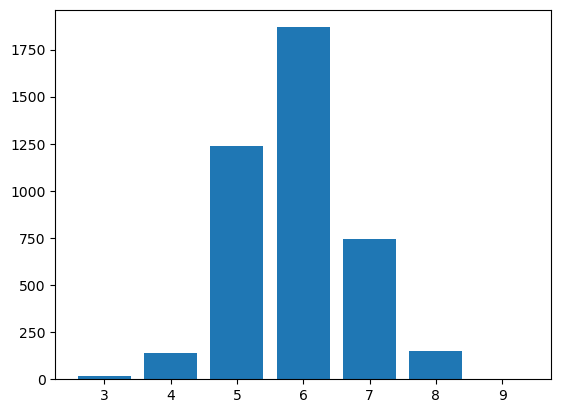

In [9]:
# 看一下要预测的
quality = df_train['quality'].value_counts()
plt.figure()
plt.bar(quality.index, quality.values)
plt.show()

In [10]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.64,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3
1,8.3,0.33,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.4,3
2,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
3,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3
4,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4155,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,8
4156,6.6,0.36,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
4157,7.4,0.24,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
4158,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9


C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\1769053165.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fixacid_corss_quality = df_train.groupby(['quality'])['fixed acidity'].agg(np.mean)


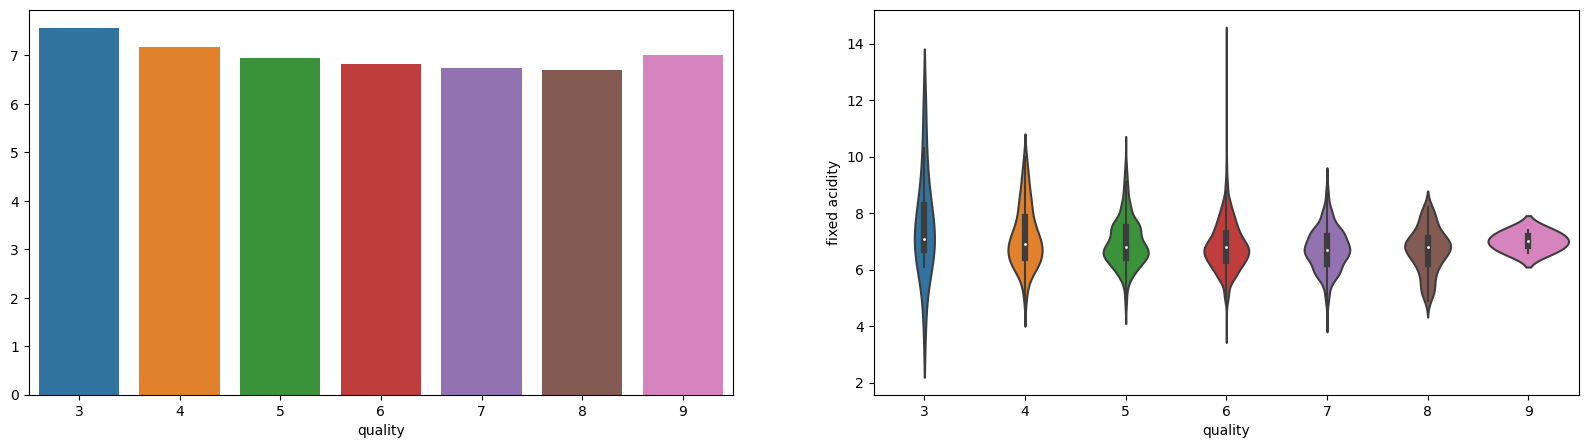

In [11]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算fixed acidity在quality分组下的均值
fixacid_corss_quality = df_train.groupby(['quality'])['fixed acidity'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=fixacid_corss_quality.index, y=fixacid_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean fixed acidity')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['fixed acidity'], ax=axs[1])
# y轴含义
plt.ylabel('fixed acidity')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\457891643.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  volacid_corss_quality = df_train.groupby(['quality'])['volatile acidity'].agg(np.mean)


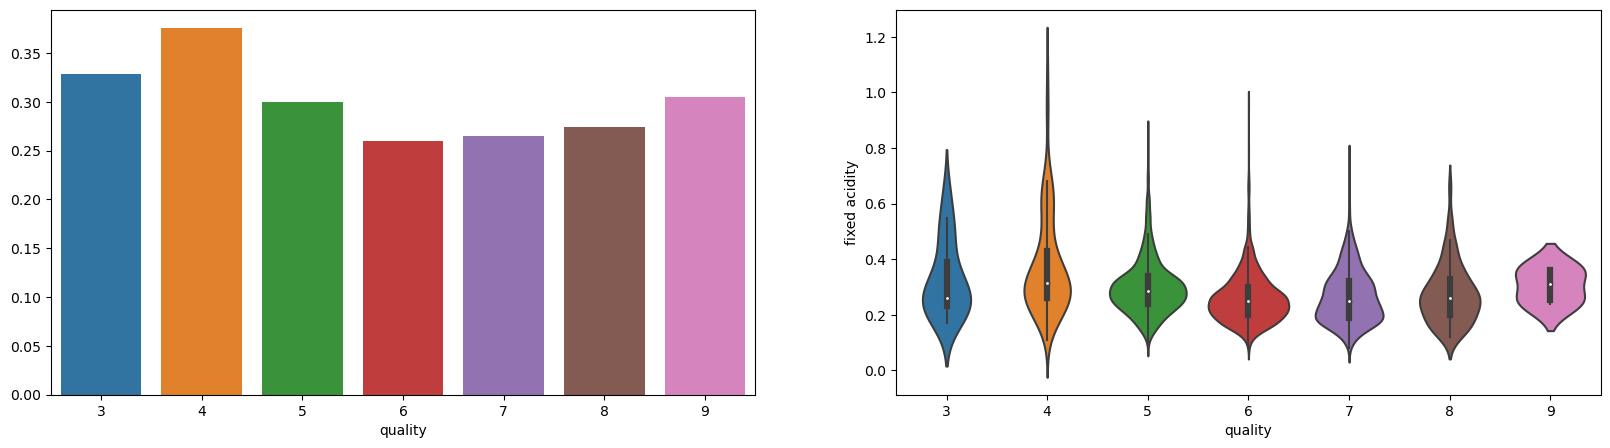

In [12]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
volacid_corss_quality = df_train.groupby(['quality'])['volatile acidity'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=volacid_corss_quality.index, y=volacid_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean fixed acidity')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['volatile acidity'], ax=axs[1])
# y轴含义
plt.ylabel('fixed acidity')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\3924261681.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  citacid_corss_quality = df_train.groupby(['quality'])['citric acid'].agg(np.mean)


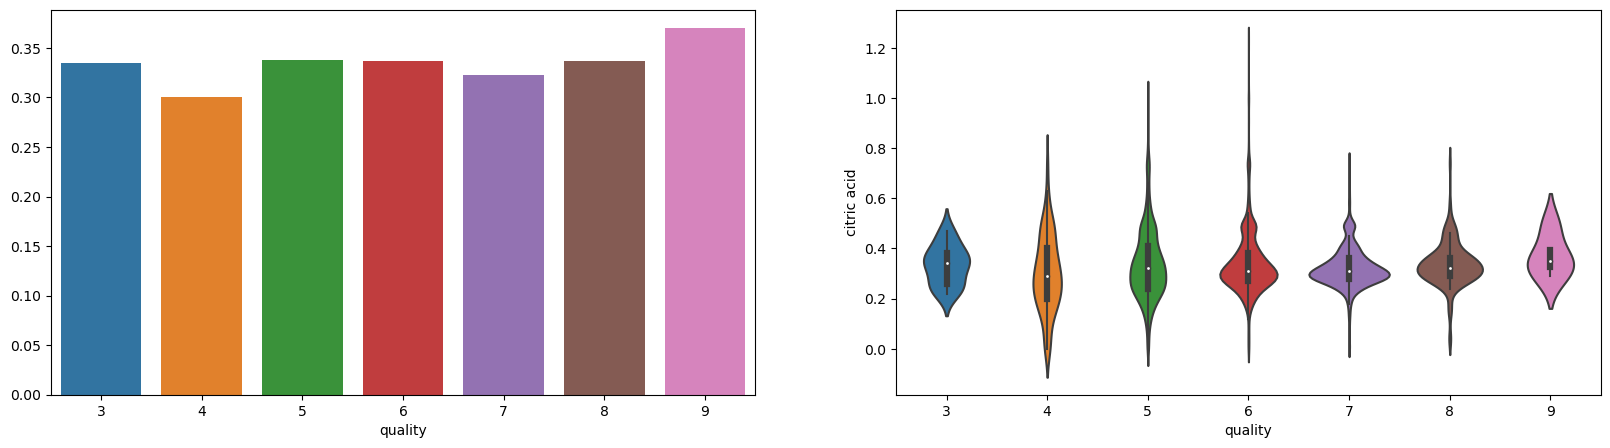

In [13]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
citacid_corss_quality = df_train.groupby(['quality'])['citric acid'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=citacid_corss_quality.index, y=citacid_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean citric acid')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['citric acid'], ax=axs[1])
# y轴含义
plt.ylabel('citric acid')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\3268671785.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  resugar_corss_quality = df_train.groupby(['quality'])['residual sugar'].agg(np.mean)


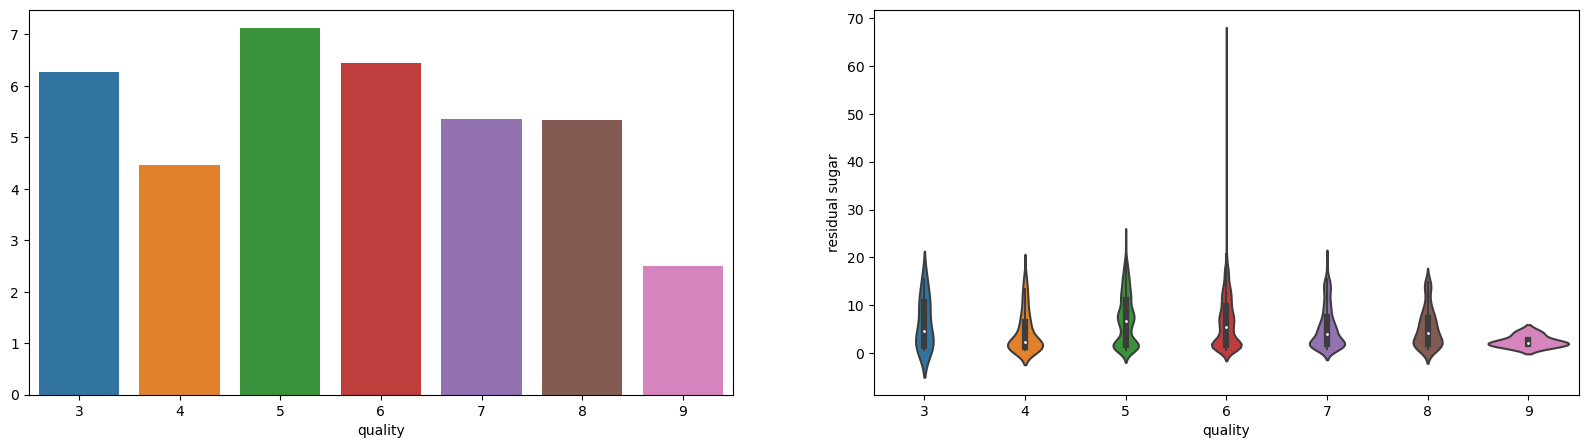

In [14]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
resugar_corss_quality = df_train.groupby(['quality'])['residual sugar'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=resugar_corss_quality.index, y=resugar_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean residual sugar')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['residual sugar'], ax=axs[1])
# y轴含义
plt.ylabel('residual sugar')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\1738371716.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  chlorides_corss_quality = df_train.groupby(['quality'])['chlorides'].agg(np.mean)


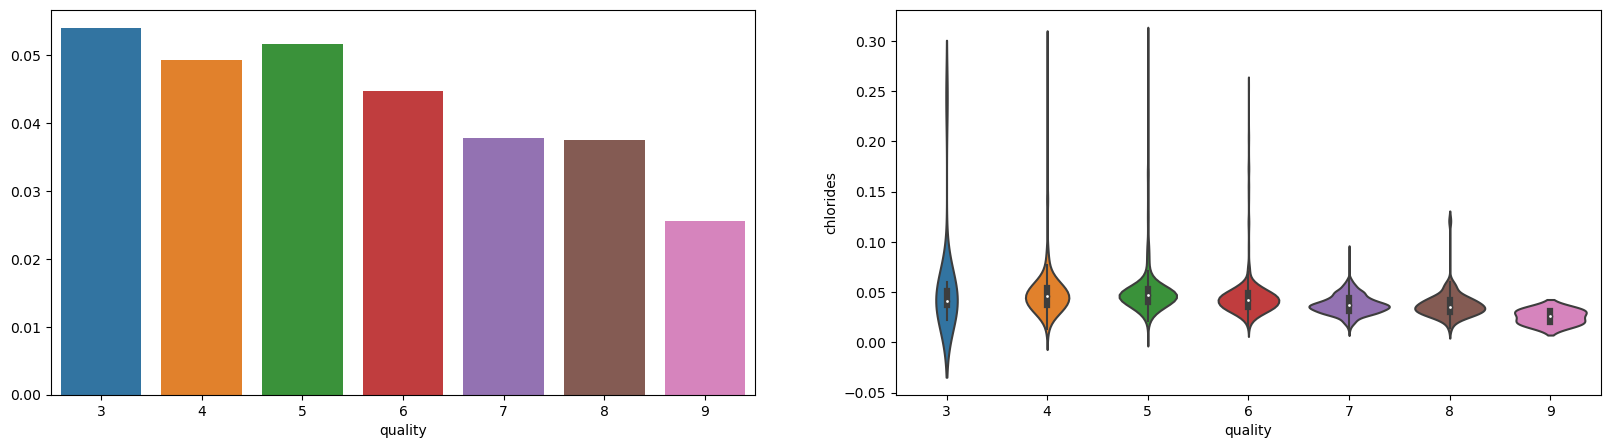

In [15]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
chlorides_corss_quality = df_train.groupby(['quality'])['chlorides'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=chlorides_corss_quality.index, y=chlorides_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean chlorides')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['chlorides'], ax=axs[1])
# y轴含义
plt.ylabel('chlorides')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\1946898610.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fsuldioxide_corss_quality = df_train.groupby(['quality'])['free sulfur dioxide'].agg(np.mean)


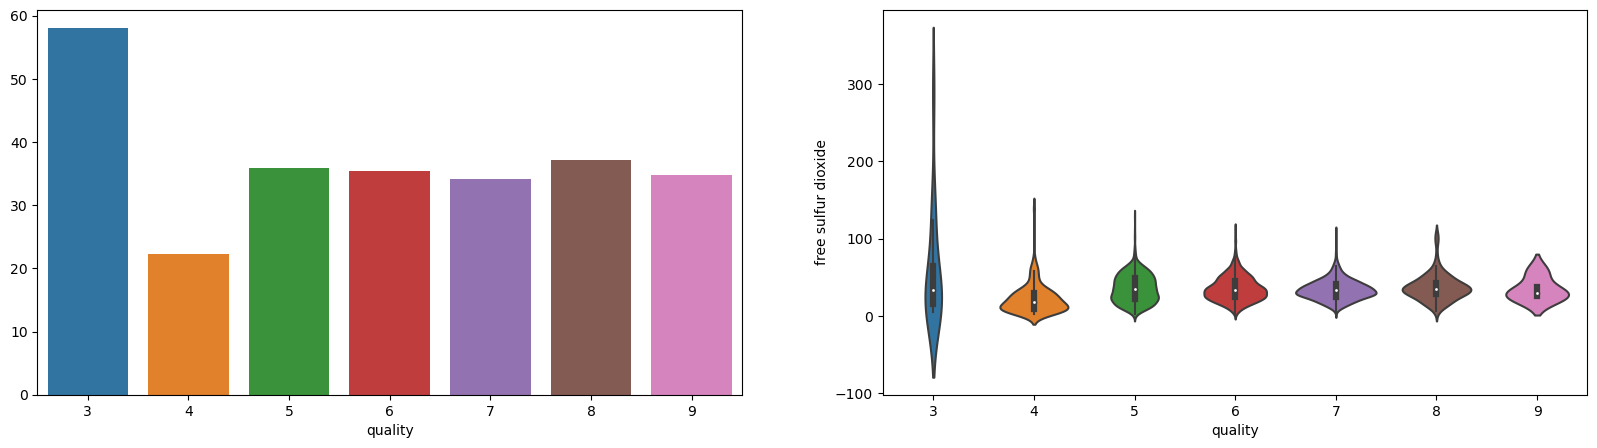

In [16]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
fsuldioxide_corss_quality = df_train.groupby(['quality'])['free sulfur dioxide'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=fsuldioxide_corss_quality.index, y=fsuldioxide_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean free sulfur dioxide')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['free sulfur dioxide'], ax=axs[1])
# y轴含义
plt.ylabel('free sulfur dioxide')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\839719759.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  totalsuldioxide_corss_quality = df_train.groupby(['quality'])['total sulfur dioxide'].agg(np.mean)


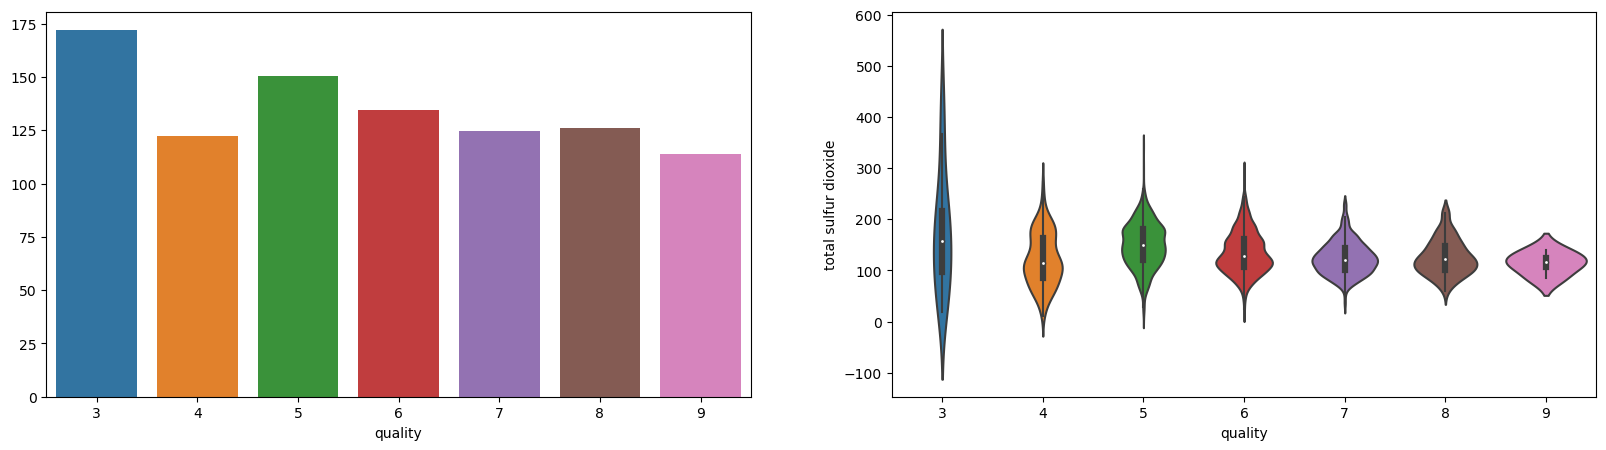

In [17]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
totalsuldioxide_corss_quality = df_train.groupby(['quality'])['total sulfur dioxide'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=totalsuldioxide_corss_quality.index, y=totalsuldioxide_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean total sulfur dioxide')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['total sulfur dioxide'], ax=axs[1])
# y轴含义
plt.ylabel('total sulfur dioxide')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\449836661.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  density_corss_quality = df_train.groupby(['quality'])['density'].agg(np.mean)


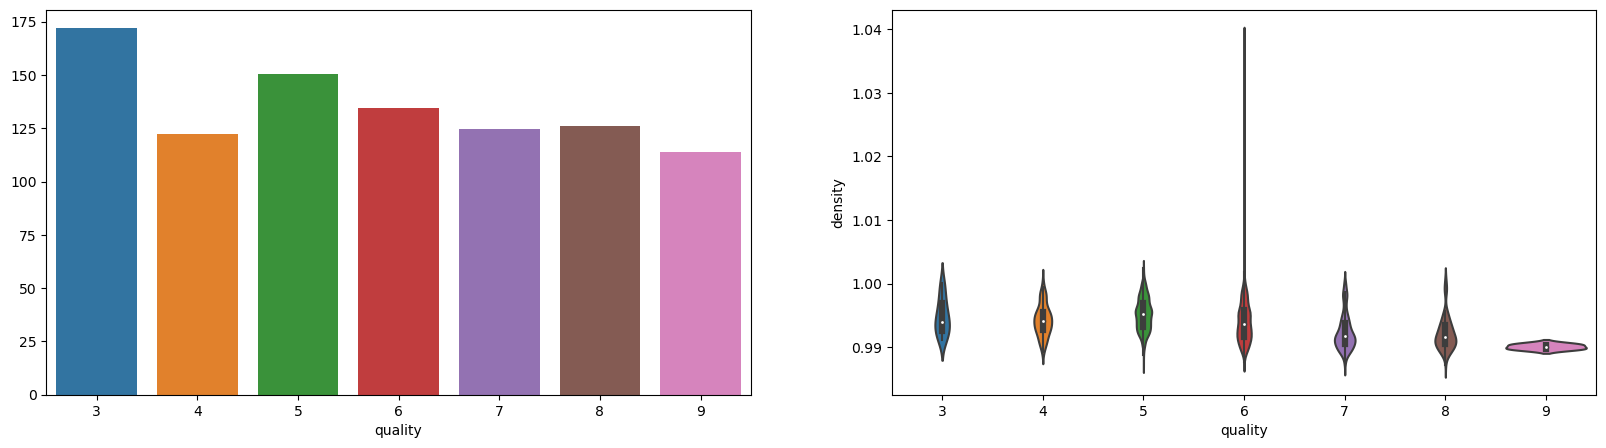

In [18]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
density_corss_quality = df_train.groupby(['quality'])['density'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=totalsuldioxide_corss_quality.index, y=totalsuldioxide_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean density')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['density'], ax=axs[1])
# y轴含义
plt.ylabel('density')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\1039030850.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ph_corss_quality = df_train.groupby(['quality'])['pH'].agg(np.mean)


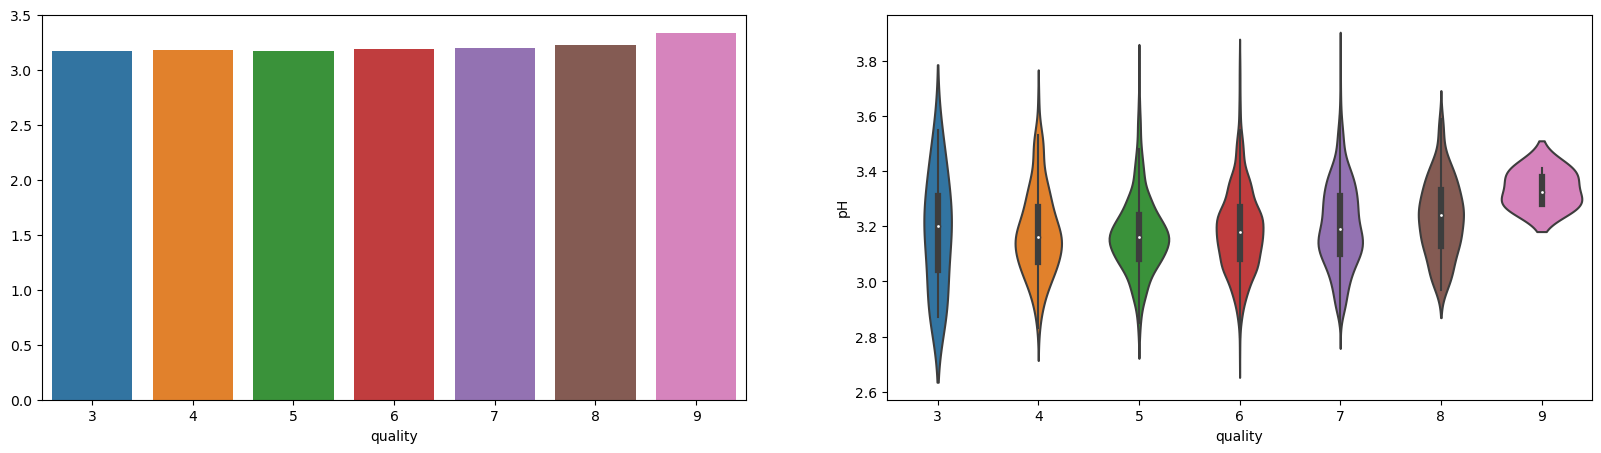

In [19]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
ph_corss_quality = df_train.groupby(['quality'])['pH'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=ph_corss_quality.index, y=ph_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean pH')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['pH'], ax=axs[1])
# y轴含义
plt.ylabel('pH')
plt.show()

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\914155531.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sulphates_corss_quality = df_train.groupby(['quality'])['sulphates'].agg(np.mean)


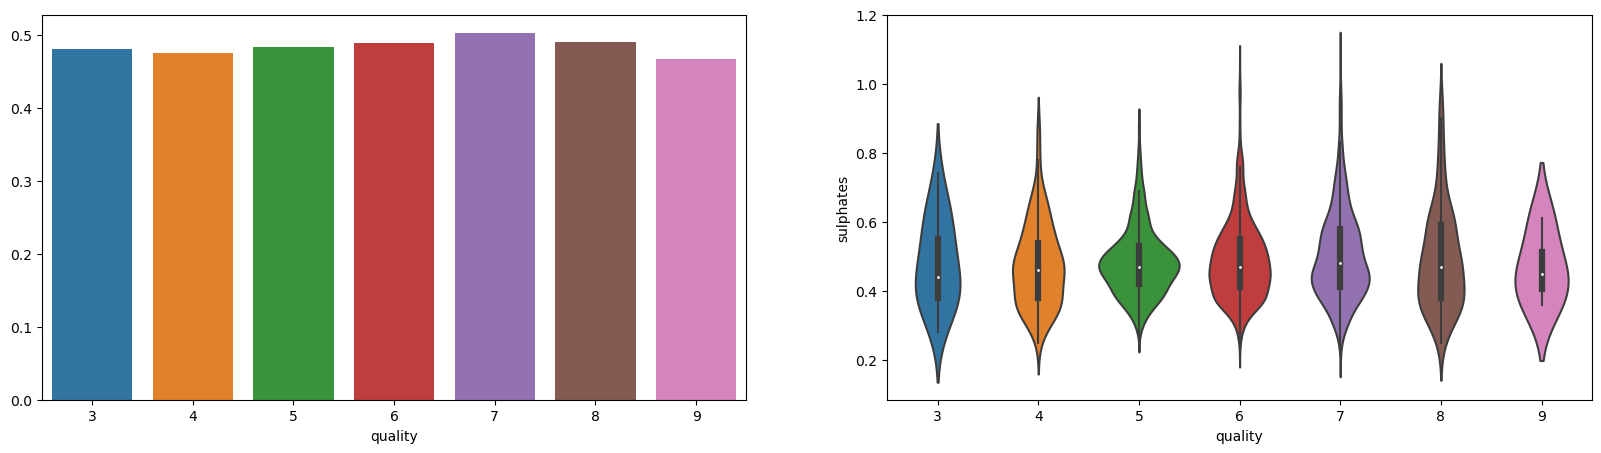

In [20]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
sulphates_corss_quality = df_train.groupby(['quality'])['sulphates'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=sulphates_corss_quality.index, y=sulphates_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean sulphates')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['sulphates'], ax=axs[1])
# y轴含义
plt.ylabel('sulphates')
plt.show()


C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\1123629603.py:4: FutureWarning: The provided callable <function mean at 0x00000271543C42C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  alcohol_corss_quality = df_train.groupby(['quality'])['alcohol'].agg(np.mean)


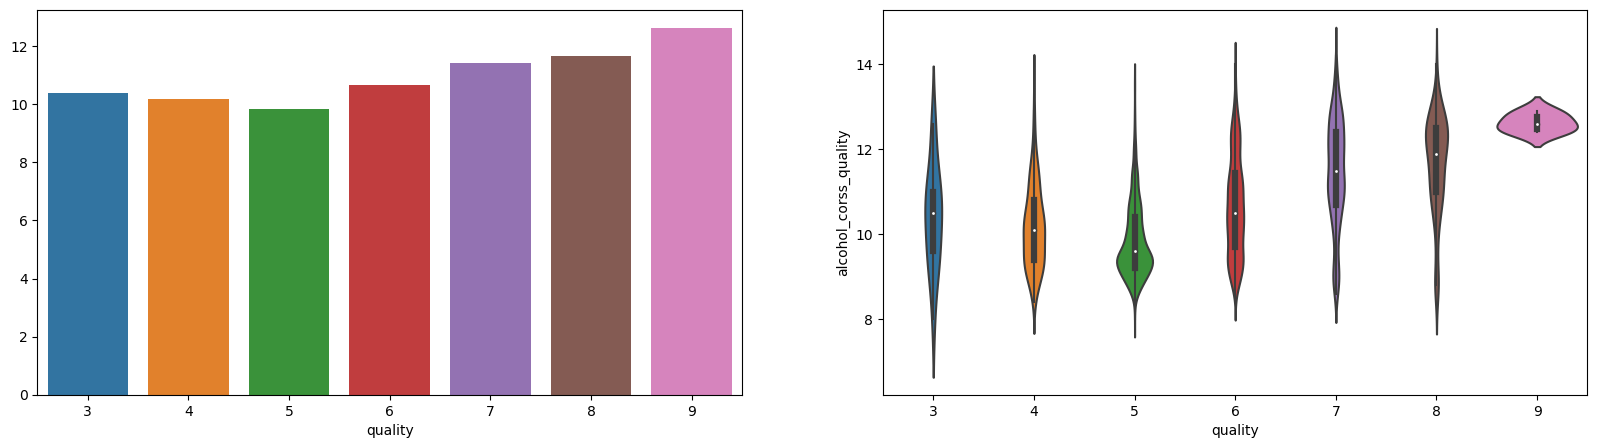

In [21]:
# 定义画图
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
# 以quality为分组依据，计算volatile acidity在quality分组下的均值
alcohol_corss_quality = df_train.groupby(['quality'])['alcohol'].agg(np.mean)
# 画柱状图函数
sns.barplot(x=alcohol_corss_quality.index, y=alcohol_corss_quality.values, ax=axs[0])
# y轴含义
plt.ylabel('mean alcohol_corss_quality')
# 画小提琴图
sns.violinplot(x=df_train['quality'], y=df_train['alcohol'], ax=axs[1])
# y轴含义
plt.ylabel('alcohol_corss_quality')
plt.show()


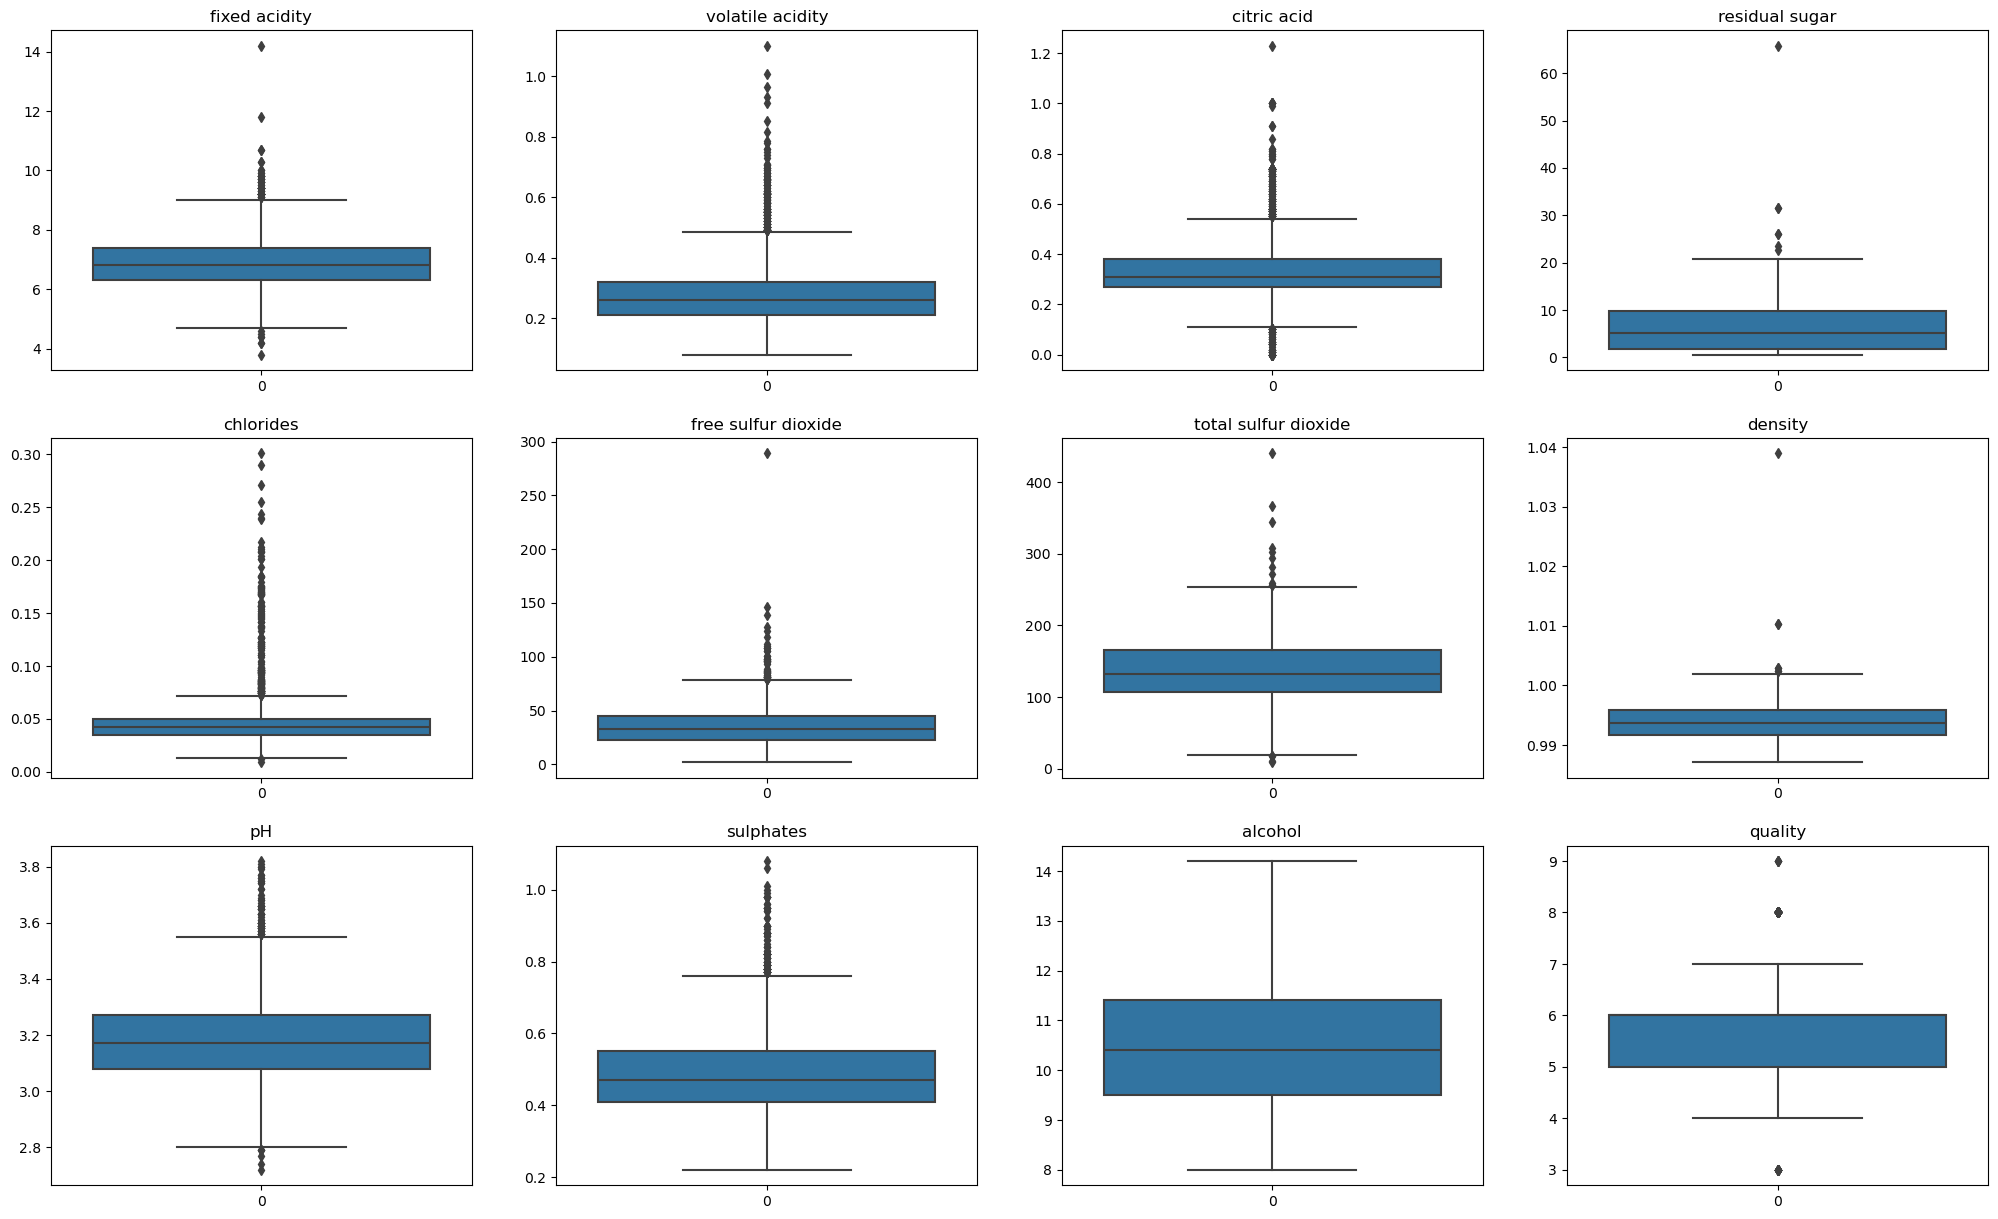

In [22]:
plt.figure(figsize=(25, 15))

for index, var in enumerate(df_train):
    plt.subplot(3, 4, index+1)
    sns.boxplot(data=df_train[var])
    plt.title(str(var))
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


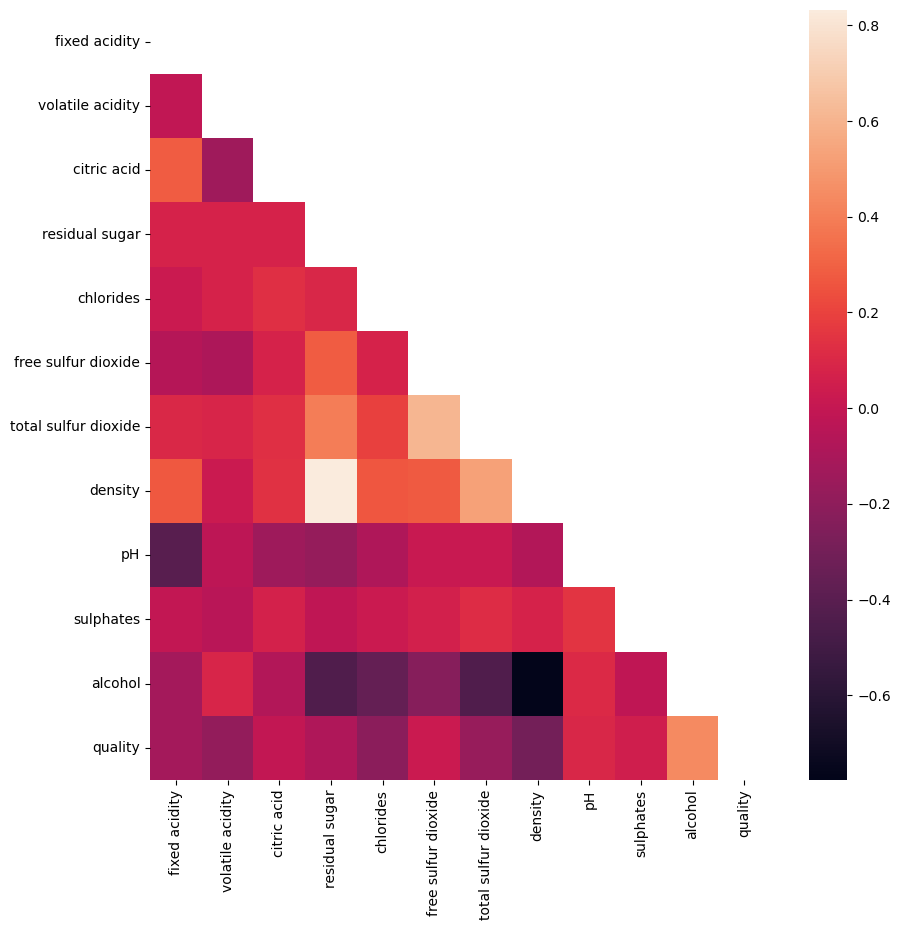

In [27]:
# 计算相关系数矩阵
df_train_corr = df_train.corr()

# 画图
plt.figure(figsize=(10, 10))

# 创建与相关矩阵相同形状的遮罩，并将右上三角部分设为True
mask = np.zeros_like(df_train_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 绘制热力图
sns.heatmap(df_train_corr, annot=True, mask=mask)

# 显示图表
plt.show()

In [29]:
# 重新读一下数据
df_train = pd.read_csv('D:/下载/学习文档/酒品质分析/Dataset.csv')
df_test = pd.read_csv('D:/下载/学习文档/酒品质分析/Testing.csv')
# 把ID去掉，没有作用
test_ID = df_test['ID'] # 后面用来包装csv
df_train = df_train.drop(columns='ID')
df_test = df_test.drop(columns='ID')
# 把quality拿出来，因为是我们要预测的东西
quality = df_train['quality']
df_train = df_train.drop(columns='quality')

In [30]:
# 下面对所有数值型数据做归一化，就ok了
min_max_scaler = MinMaxScaler()
# 这里直接对训练集和测试集都做了
min_max_scaler.fit(pd.concat([df_train,df_test]).values)
all_data = min_max_scaler.transform(pd.concat([df_train,df_test]).values)

In [31]:
# 把train和test的分出来, 到此，数据处理就结束了，这些数据已经可以送到模型中训练了
train_data = all_data[:len(df_train)]
test_data = all_data[len(df_train):]

In [32]:
# 其实里面有不少参数，但这里就用默认的好了
model = DecisionTreeClassifier()  
# 使用sklearn自带的模型，只需要两行代码就可以完成训练，先fit后predict
model.fit(train_data, quality)
predictions = model.predict(test_data)

In [33]:
# 把predictions包装成csv就可以提交了
sub_csv = pd.DataFrame()
sub_csv['ID'] = test_ID
sub_csv['quality'] = predictions
sub_csv.to_csv('submission.csv', index=False)

In [34]:
# 其实里面有不少参数，但这里就用默认的好了
model = RandomForestClassifier()
# 使用sklearn自带的模型，只需要两行代码就可以完成训练，先fit后predict
model.fit(train_data, quality)
predictions = model.predict(test_data)

In [35]:
# 把predictions包装成csv就可以提交了
sub_csv = pd.DataFrame()
sub_csv['ID'] = test_ID
sub_csv['quality'] = predictions
sub_csv.to_csv('submission.csv', index=False)

In [36]:
# 用一个csv，把所有结果存起来，做投票
temp_csv = pd.DataFrame()

In [37]:
n_splits = 5
mean_f1_score = 0
kf = KFold(n_splits=n_splits, shuffle=True) # 使用sklearn自带划分k折的函数
for fold, (trn_idx, val_idx) in enumerate(kf.split(train_data, quality)):
    print('fold:', fold)
    X_train, y_train = train_data[trn_idx], quality[trn_idx]
    X_val, y_val = train_data[val_idx], quality[val_idx]
    # 定义模型
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # 调用skelarn计算f1 score的函数
    f1 = f1_score(y_val, y_pred, average='macro')
    mean_f1_score += f1
    print('f1_socre is :', f1)
    # 用这一轮的模型，去预测test
    test_pred = model.predict(test_data)
    pred_name = str(fold)+'_'+'quality'
    temp_csv[pred_name] = test_pred
print('mean f1_score is :', mean_f1_score / n_splits)

fold: 0
f1_socre is : 0.42991466753433344
fold: 1
f1_socre is : 0.49572809155164216
fold: 2
f1_socre is : 0.4420887872353899
fold: 3
f1_socre is : 0.3793402147647839
fold: 4
f1_socre is : 0.47364205817791066
mean f1_score is : 0.44414276385281204


In [38]:
sbu_csv = pd.DataFrame()
sbu_csv['ID'] = test_ID
# 取所有预测的众数
sbu_csv['quality'] = temp_csv.mode(axis=1)[0].map(lambda x:int(x))  # 取众数是float型，改为int型
sbu_csv.to_csv('submission.csv', index=False)

In [39]:
# 下面的内容和上面的一样，就放一起了

# 重新读一下数据
df_train = pd.read_csv('D:/下载/学习文档/酒品质分析/Dataset.csv')
df_test = pd.read_csv('D:/下载/学习文档/酒品质分析/Testing.csv')
# 把ID去掉，没有作用
test_ID = df_test['ID'] # 后面用来包装csv
df_train = df_train.drop(columns='ID')
df_test = df_test.drop(columns='ID')

# 去掉3号和9号
df_train = df_train.drop(index = df_train[df_train['quality'] == 3].index)
df_train = df_train.drop(index = df_train[df_train['quality'] == 9].index)
df_train = df_train.reset_index(drop=True)

# 下面的内容和上面一样 ----------------------------

# 把quality拿出来，因为是我们要预测的东西
quality = df_train['quality']
df_train = df_train.drop(columns='quality')

# 下面对所有数值型数据做归一化，就ok了
min_max_scaler = MinMaxScaler()
# 这里直接对训练集和测试集都做了
min_max_scaler.fit(pd.concat([df_train,df_test]).values)
all_data = min_max_scaler.transform(pd.concat([df_train,df_test]).values)

# 把train和test的分出来, 到此，数据处理就结束了，这些数据已经可以送到模型中训练了
train_data = all_data[:len(df_train)]
test_data = all_data[len(df_train):]

In [40]:
# 用一个csv，把所有结果存起来，做投票
temp_csv = pd.DataFrame()

In [41]:
n_splits = 5
mean_f1_score = 0
kf = KFold(n_splits=n_splits, shuffle=True) # 使用sklearn自带划分k折的函数
for fold, (trn_idx, val_idx) in enumerate(kf.split(train_data, quality)):
    print('fold:', fold)
    X_train, y_train = train_data[trn_idx], quality[trn_idx]
    
    # 下面是对数据进行重采样 ---------------------------------
    randomoversampler = RandomOverSampler()
    X_train, y_train = randomoversampler.fit_resample(X_train, y_train)
    # 重采样就完成了
    # ----------------------------------------------------
    
    X_val, y_val = train_data[val_idx], quality[val_idx]
    # 定义模型
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # 调用skelarn计算f1 score的函数
    f1 = f1_score(y_val, y_pred, average='macro')
    mean_f1_score += f1
    print('f1_socre is :', f1)
    # 用这一轮的模型，去预测test
    test_pred = model.predict(test_data)
    pred_name = str(fold)+'_'+'quality'
    temp_csv[pred_name] = test_pred
print('mean f1_score is :', mean_f1_score / n_splits)

fold: 0
f1_socre is : 0.5782094667580788
fold: 1
f1_socre is : 0.5622513026924935
fold: 2
f1_socre is : 0.6512831007973762
fold: 3
f1_socre is : 0.6058528629217965
fold: 4
f1_socre is : 0.6107799939783198
mean f1_score is : 0.6016753454296129


In [42]:
sbu_csv = pd.DataFrame()
sbu_csv['ID'] = test_ID
# 取所有预测的众数
sbu_csv['quality'] = temp_csv.mode(axis=1)[0].map(lambda x:int(x))  # 取众数是float型，改为int型
sbu_csv.to_csv('submission.csv', index=False)

In [43]:
# 重新读一下数据
df_train = pd.read_csv('D:/下载/学习文档/酒品质分析/Dataset.csv')
df_test = pd.read_csv('D:/下载/学习文档/酒品质分析/Testing.csv')
# 把ID去掉，没有作用
test_ID = df_test['ID'] # 后面用来包装csv
df_train = df_train.drop(columns='ID')
df_test = df_test.drop(columns='ID')

df_train = df_train.drop(index = df_train[df_train['quality'] == 3].index)
df_train = df_train.drop(index = df_train[df_train['quality'] == 9].index)
df_train = df_train.reset_index(drop=True)
 
# 把quality拿出来，因为是我们要预测的东西
quality = df_train['quality']
df_train = df_train.drop(columns='quality')

C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\188635450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S_m, kde=False, fit=st.johnsonsu)
C:\Users\摸鱼的葡式蛋挞\AppData\Local\Temp\ipykernel_2712\188635450.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S_m, kde=False, fit=st.norm)
C:\User

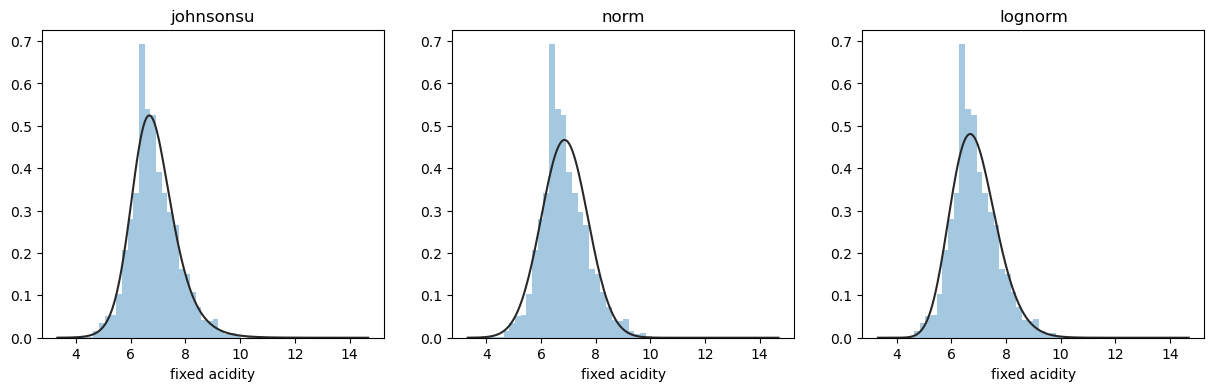

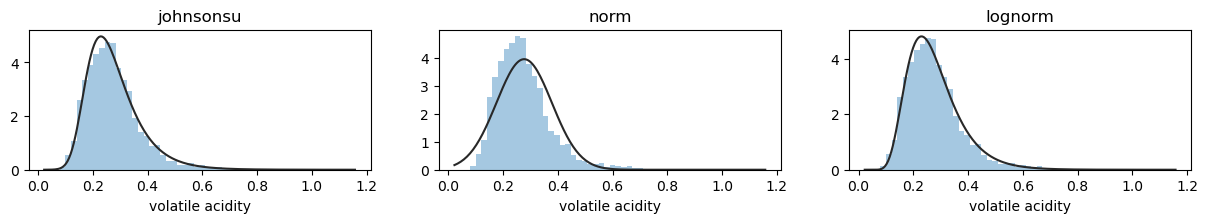

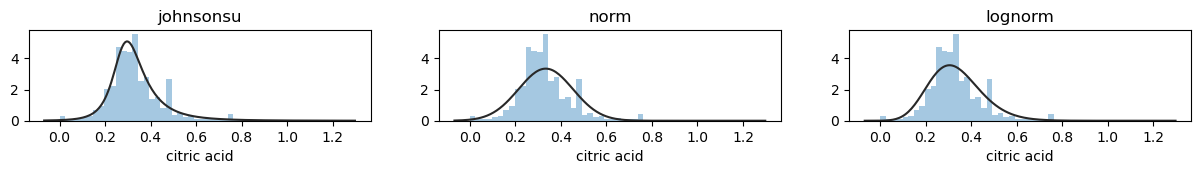

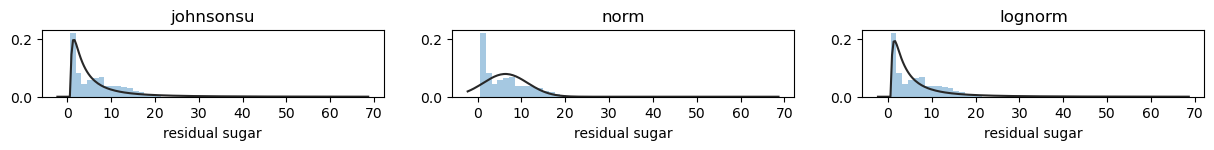

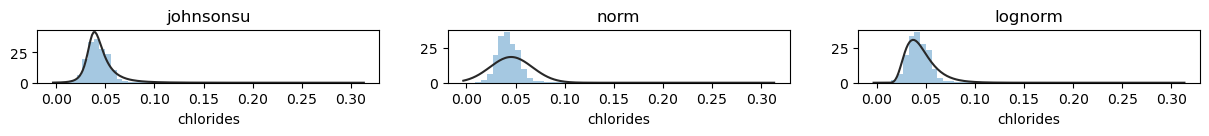

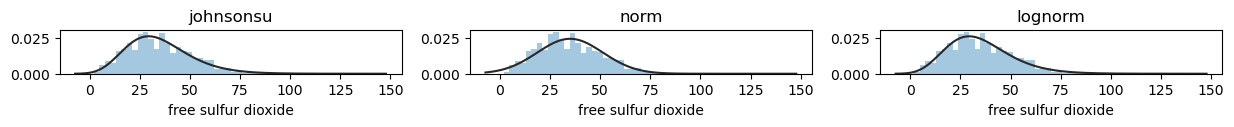

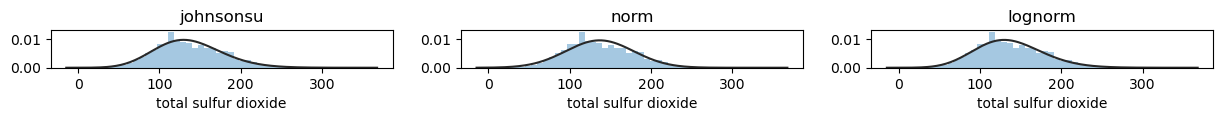

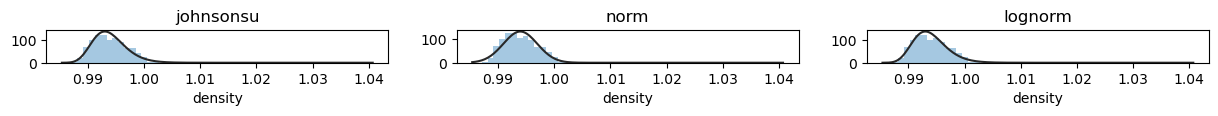

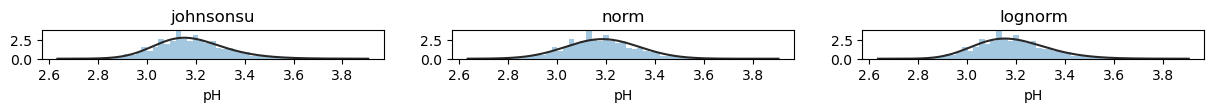

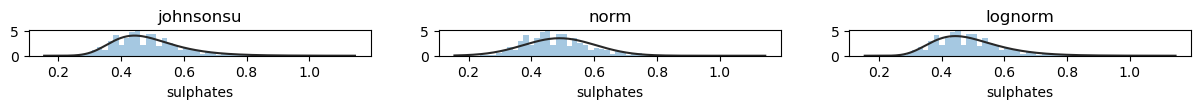

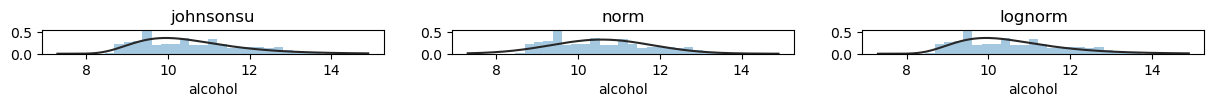

In [44]:
def analyse_plot(S_m, index):
    fig = plt.figure(figsize=(15,4))
    plt.subplot(index,3,1)
    sns.distplot(S_m, kde=False, fit=st.johnsonsu)
    plt.title('johnsonsu')
    plt.subplot(index,3,2)
    sns.distplot(S_m, kde=False, fit=st.norm)
    plt.title('norm')
    plt.subplot(index,3,3)
    sns.distplot(S_m, kde=False, fit=st.lognorm)
    plt.title('lognorm')

index = 1
for feature in df_train.columns:
    analyse_plot(df_train[feature], index)
    index+=1

In [45]:
features = ['fixed acidity', 'volatile acidity', 'chlorides', 'density', 'pH', 'sulphates']
for feature in features:
    df_train[feature] = np.log(df_train[feature])
    df_test[feature] = np.log(df_test[feature])

In [46]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.916923,-0.400478,0.30,13.0,-1.237874,22.0,193.0,-0.001601,1.124930,-0.400478,9.0
1,1.931521,-1.609438,0.34,1.9,-3.146555,25.0,136.0,-0.006521,1.196948,-0.510826,10.1
2,1.887070,-0.967584,0.18,1.2,-3.170086,20.0,84.0,-0.007327,1.169381,-0.798508,10.1
3,1.791759,-0.928870,0.00,1.4,-3.170086,7.0,55.0,-0.008688,1.214913,-0.967584,11.2
4,2.001480,-1.771957,0.40,5.5,-3.296837,34.0,161.0,-0.006521,1.115142,-0.478036,11.5
...,...,...,...,...,...,...,...,...,...,...,...
4134,1.902108,-1.272966,0.31,7.4,-3.194183,7.0,81.0,-0.007488,1.111858,-0.755023,11.4
4135,1.740466,-1.897120,0.47,11.4,-3.352407,49.0,128.0,-0.005455,1.108563,-1.078810,10.5
4136,1.686399,-0.634878,0.16,2.7,-3.324236,34.0,128.0,-0.011506,1.163151,-0.634878,13.2
4137,1.757858,-1.139434,0.28,4.3,-3.442019,46.0,115.0,-0.010596,1.150572,-0.562119,13.0


In [47]:
df_train['alcohol mul pH'] = df_train['alcohol'] * df_train['pH']
df_train['total sulfur dioxide mul pH'] = df_train['total sulfur dioxide'] * df_train['pH']
df_train['total sulfur dioxide mul alcohol'] = df_train['total sulfur dioxide'] * df_train['alcohol']

df_test['alcohol mul pH'] = df_test['alcohol'] * df_test['pH']
df_test['total sulfur dioxide mul pH'] = df_test['total sulfur dioxide'] * df_test['pH']
df_test['total sulfur dioxide mul alcohol'] = df_test['total sulfur dioxide'] * df_test['alcohol']

In [58]:
# 下面对所有数值型数据做归一化，就ok了
min_max_scaler = MinMaxScaler()

# 这里直接对训练集和测试集都做了
min_max_scaler.fit(pd.concat([df_train,df_test]).values)
all_data = min_max_scaler.transform(pd.concat([df_train,df_test]).values)

# 把train和test的分出来, 到此，数据处理就结束了，这些数据已经可以送到模型中训练了
train_data = all_data[:len(df_train)]
test_data = all_data[len(df_train):]


# 用一个csv，把所有结果存起来，做投票
temp_csv = pd.DataFrame()


n_splits = 5
mean_f1_score = 0
kf = KFold(n_splits=n_splits, shuffle=True) # 使用sklearn自带划分k折的函数
for fold, (trn_idx, val_idx) in enumerate(kf.split(train_data, quality)):
    print('fold:', fold)
    X_train, y_train = train_data[trn_idx], quality[trn_idx]
    
    # 下面是对数据进行重采样 ---------------------------------
    randomoversampler = RandomOverSampler()
    X_train, y_train = randomoversampler.fit_resample(X_train, y_train)
    # 重采样就完成了
    # ----------------------------------------------------
    
    X_val, y_val = train_data[val_idx], quality[val_idx]
    # 定义模型
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # 调用skelarn计算f1 score的函数
    f1 = f1_score(y_val, y_pred, average='macro')
    mean_f1_score += f1
    print('f1_socre is :', f1)
    # 用这一轮的模型，去预测test
    test_pred = model.predict(test_data)
    pred_name = str(fold)+'_'+'quality'
    temp_csv[pred_name] = test_pred
print('mean f1_score is :', mean_f1_score / n_splits)

fold: 0
f1_socre is : 0.5689551018160179
fold: 1
f1_socre is : 0.596523365167433
fold: 2
f1_socre is : 0.6285314407050393
fold: 3
f1_socre is : 0.5811499033299562
fold: 4
f1_socre is : 0.5644968462210734
mean f1_score is : 0.5879313314479039


In [54]:
sbu_csv = pd.DataFrame()
sbu_csv['ID'] = test_ID
# 取所有预测的众数
sbu_csv['quality'] = temp_csv.mode(axis=1)[0].map(lambda x:int(x))  # 取众数是float型，改为int型
sbu_csv.to_csv('submission.csv', index=False)